1. Importação de Bibliotecas e Dados
Primeiro, você precisará importar as bibliotecas necessárias e carregar os dados:

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

#eliminar warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import numpy as np

In [69]:
import pandas as pd

# Carregando os dados
equipamentos_df = pd.read_excel('Dados/23w06_Equipamentos.xlsx')
series_temporais_df = pd.read_excel('Dados/23w06_SeriesTemporais_Horimetros.xlsx')

2. Análise Exploratória dos Dados
Para entender a estrutura dos dados, você pode usar:

In [70]:
equipamentos_df.info()
series_temporais_df.info()

equipamentos_df.describe(include='all')
series_temporais_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Região         63 non-null     object        
 1   País           63 non-null     object        
 2   Dealer         63 non-null     object        
 3   Segmento       63 non-null     object        
 4   Modelo         63 non-null     object        
 5   Chassis ID     63 non-null     object        
 6   PIN17          57 non-null     object        
 7   Delivery Date  62 non-null     datetime64[ns]
 8   Obs.:          15 non-null     object        
 9   Estado         63 non-null     object        
 10  Região.1       63 non-null     object        
dtypes: datetime64[ns](1), object(10)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118161 entries, 0 to 118160
Data columns (total 3 columns):
 #   Column                            Non-Null Count   Dtype   

,Machine History Date Day,Compensated Working Hours By Day
count,118161,118161.000000
mean,2019-12-29 02:52:04.624876288,5.803329
min,2012-08-17 00:00:00,0.000000
25%,2018-06-28 00:00:00,0.038235
50%,2020-05-21 00:00:00,4.200000
75%,2021-10-19 00:00:00,9.200000
max,2023-02-08 00:00:00,85.450000
std,NaN,6.365152


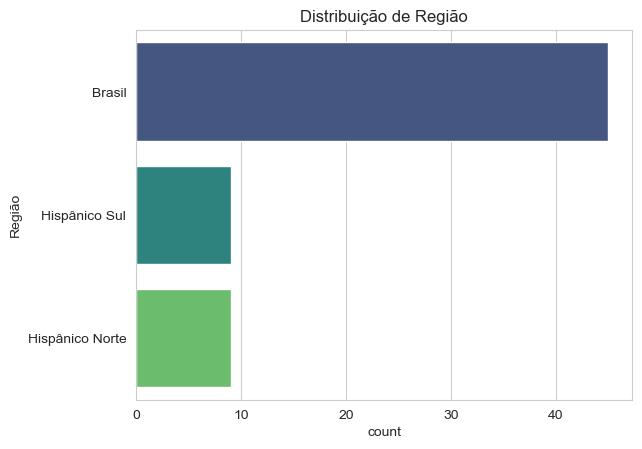

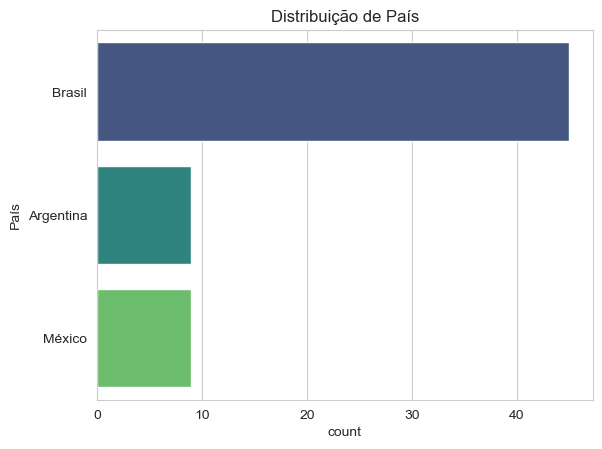

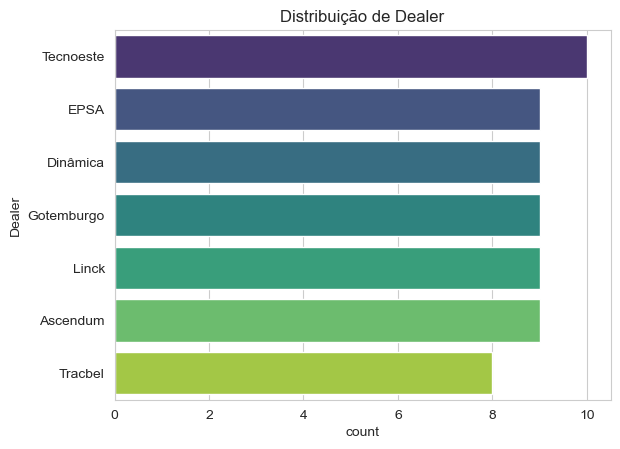

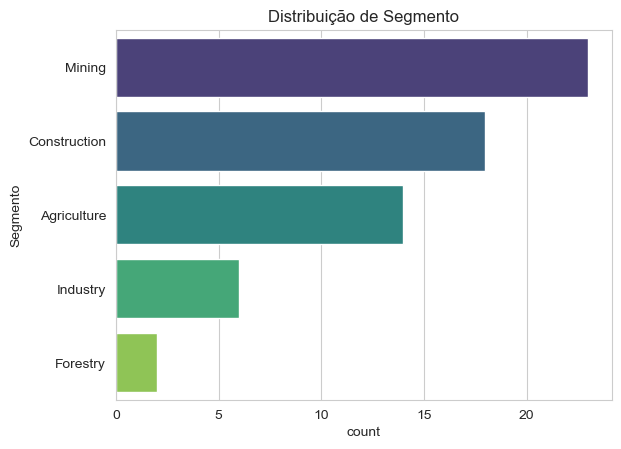

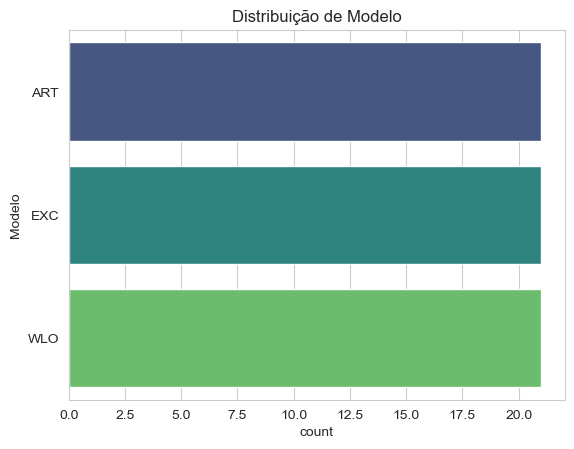

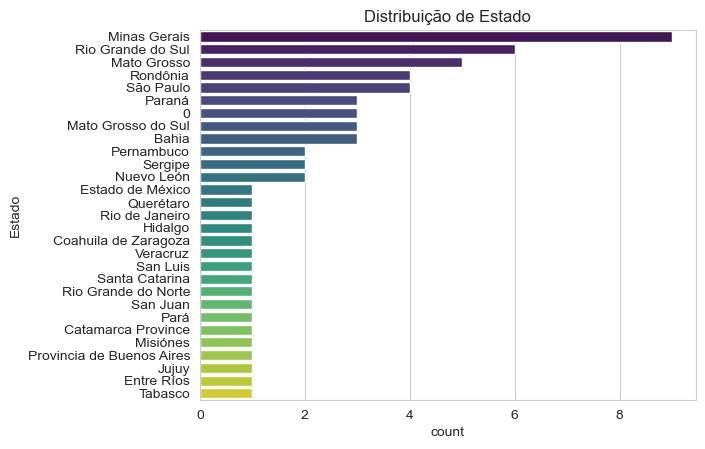

In [71]:
categorical_vars_equip = ["Região", "País", "Dealer", "Segmento", "Modelo", "Estado"]

for var in categorical_vars_equip:
    sns.countplot(data=equipamentos_df, y=var, order=equipamentos_df[var].value_counts().index, palette="viridis")
    plt.title(f'Distribuição de {var}')
    plt.show()

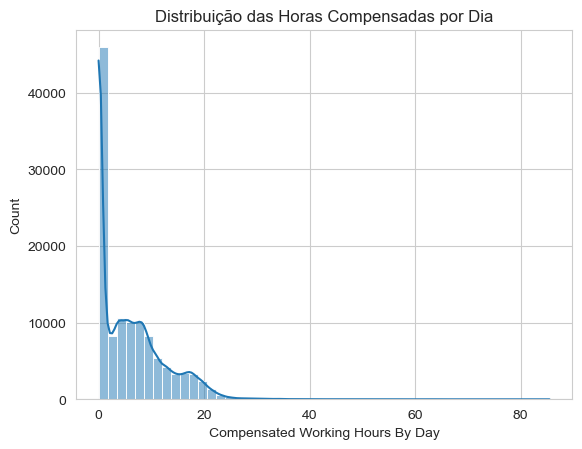

In [72]:
sns.histplot(data=series_temporais_df, x='Compensated Working Hours By Day', bins=50, kde=True)
plt.title('Distribuição das Horas Compensadas por Dia')
plt.show()

Passo 4: Análise de Valores Ausentes
É importante verificar se há valores ausentes nos dados, pois eles podem afetar a análise e a modelagem.

Para verificar a presença de valores ausentes em ambos os dataframes, execute:

In [73]:
print(equipamentos_df.isnull().sum())
print(series_temporais_df.isnull().sum())

Região            0
País              0
Dealer            0
Segmento          0
Modelo            0
Chassis ID        0
PIN17             6
Delivery Date     1
Obs.:            48
Estado            0
Região.1          0
dtype: int64
Chassis Id*                         0
Machine History Date Day            0
Compensated Working Hours By Day    0
dtype: int64


Passo 5: Análise de Valores Anômalos
Valores anômalos ou outliers podem distorcer ou influenciar negativamente os resultados. Vamos focar no dataframe series_temporais_df e verificar se há alguma anomalia nas horas compensadas por dia.

Para visualizar potenciais outliers, use um boxplot:

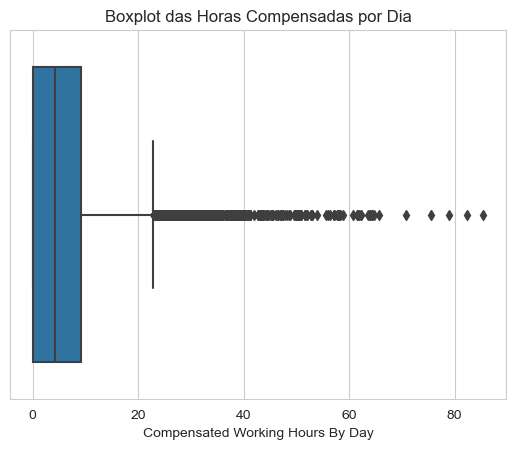

In [74]:
sns.boxplot(data=series_temporais_df, x='Compensated Working Hours By Day')
plt.title('Boxplot das Horas Compensadas por Dia')
plt.show()

Passo 7: Análise Temporal
Como você possui dados de séries temporais, é útil visualizar as tendências ao longo do tempo.

Vamos plotar um gráfico de linha para visualizar a tendência das horas compensadas por dia ao longo do tempo.

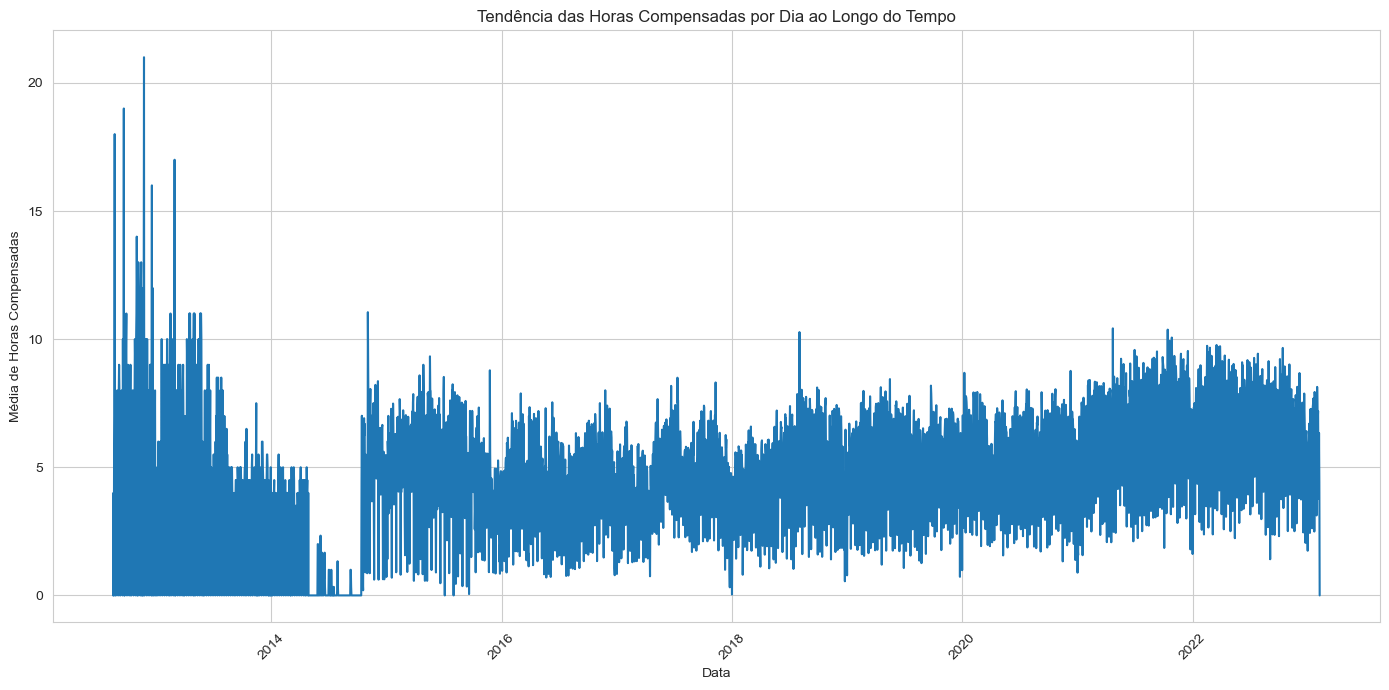

In [75]:
# Agrupando os dados por data e calculando a média das horas compensadas
time_series_data = series_temporais_df.groupby('Machine History Date Day')['Compensated Working Hours By Day'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data, x='Machine History Date Day', y='Compensated Working Hours By Day')
plt.title('Tendência das Horas Compensadas por Dia ao Longo do Tempo')
plt.ylabel('Média de Horas Compensadas')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
merged_df = pd.merge(series_temporais_df, equipamentos_df, left_on='Chassis Id*', right_on='Chassis ID', how='left')

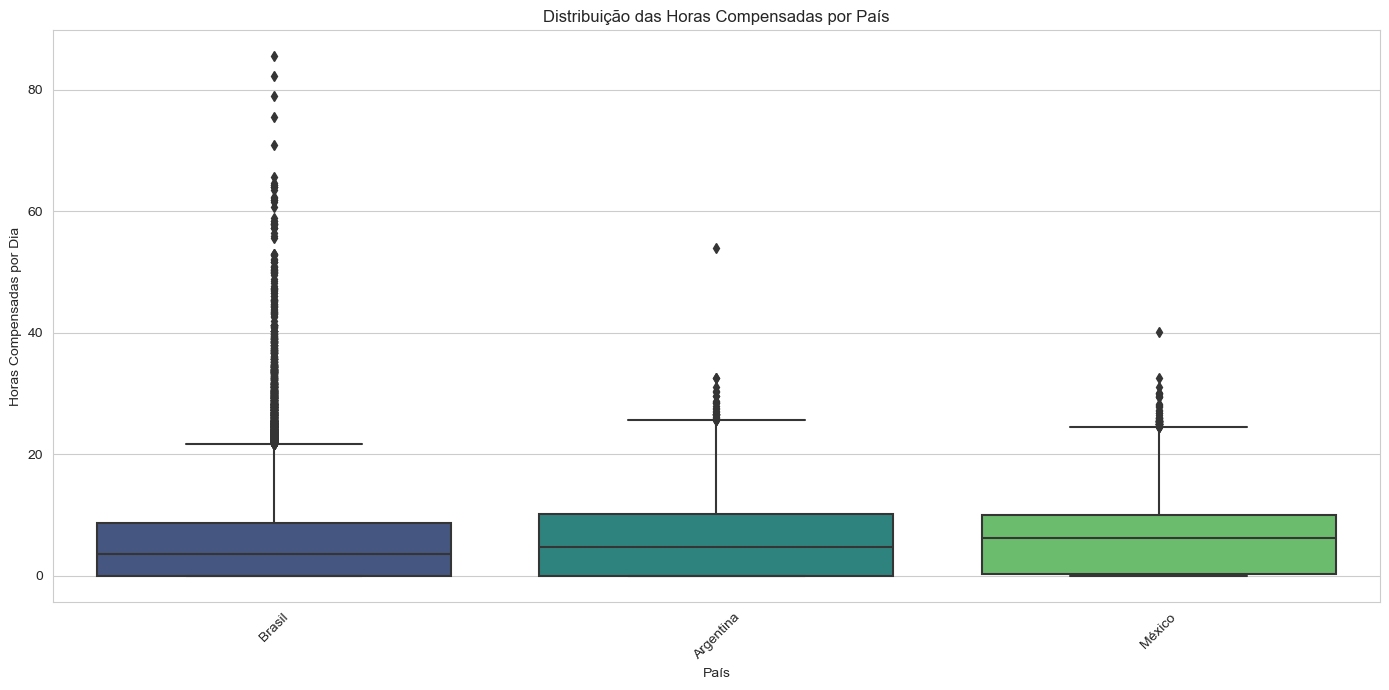

In [77]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=merged_df, x='País', y='Compensated Working Hours By Day', palette="viridis")
plt.title('Distribuição das Horas Compensadas por País')
plt.ylabel('Horas Compensadas por Dia')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Passo 9: Análise de Agrupamento
Para entender o comportamento das horas compensadas em diferentes categorias, podemos agrupar os dados e calcular estatísticas descritivas.

Por exemplo, podemos calcular a média das horas compensadas por dia para cada país e segmento:

In [78]:
grouped_by_country = merged_df.groupby('País')['Compensated Working Hours By Day'].mean()
grouped_by_segment = merged_df.groupby('Segmento')['Compensated Working Hours By Day'].mean()

Passo 10: Visualizações Avançadas
Podemos também criar visualizações mais avançadas para entender a relação entre as variáveis.

Distribuição das Horas Compensadas por País e Segmento:

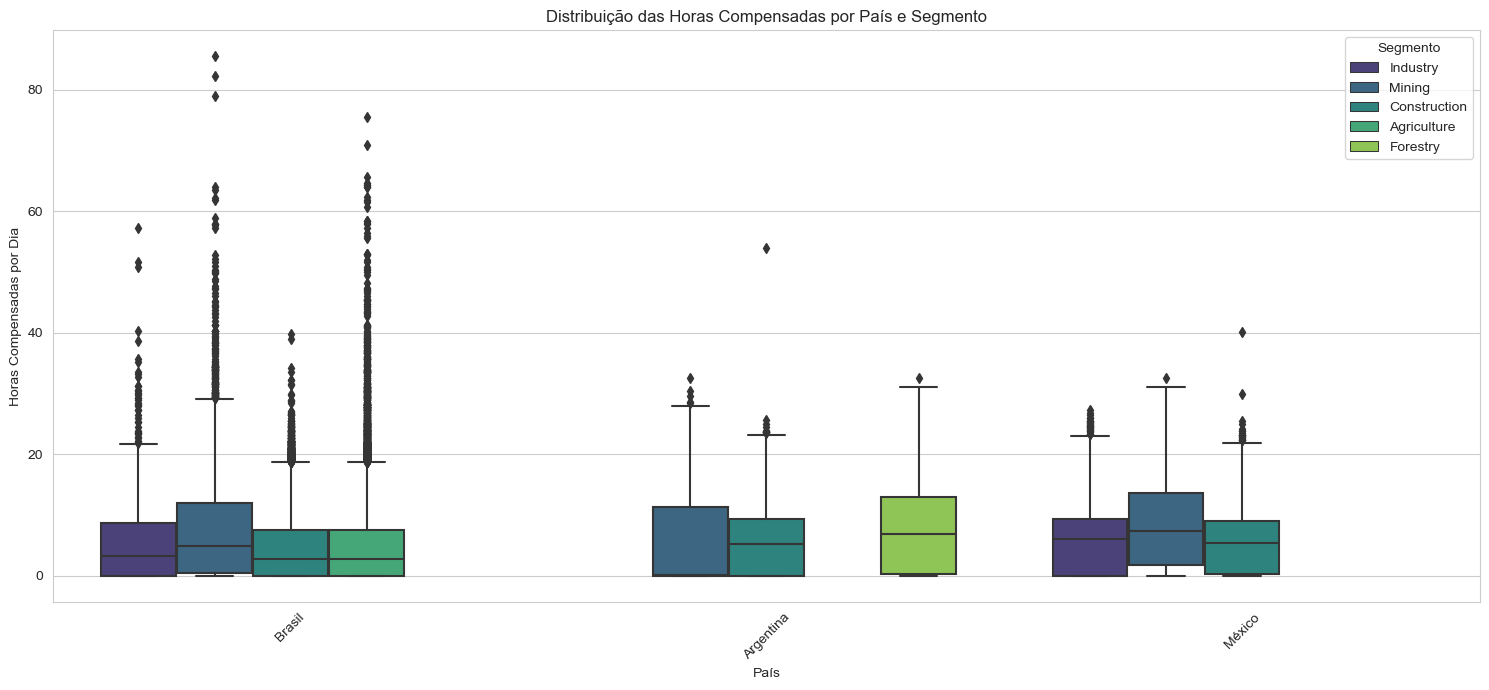

In [79]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=merged_df, x='País', y='Compensated Working Hours By Day', hue='Segmento', palette='viridis')
plt.title('Distribuição das Horas Compensadas por País e Segmento')
plt.ylabel('Horas Compensadas por Dia')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()

Distribuição das Horas Compensadas por Modelo:

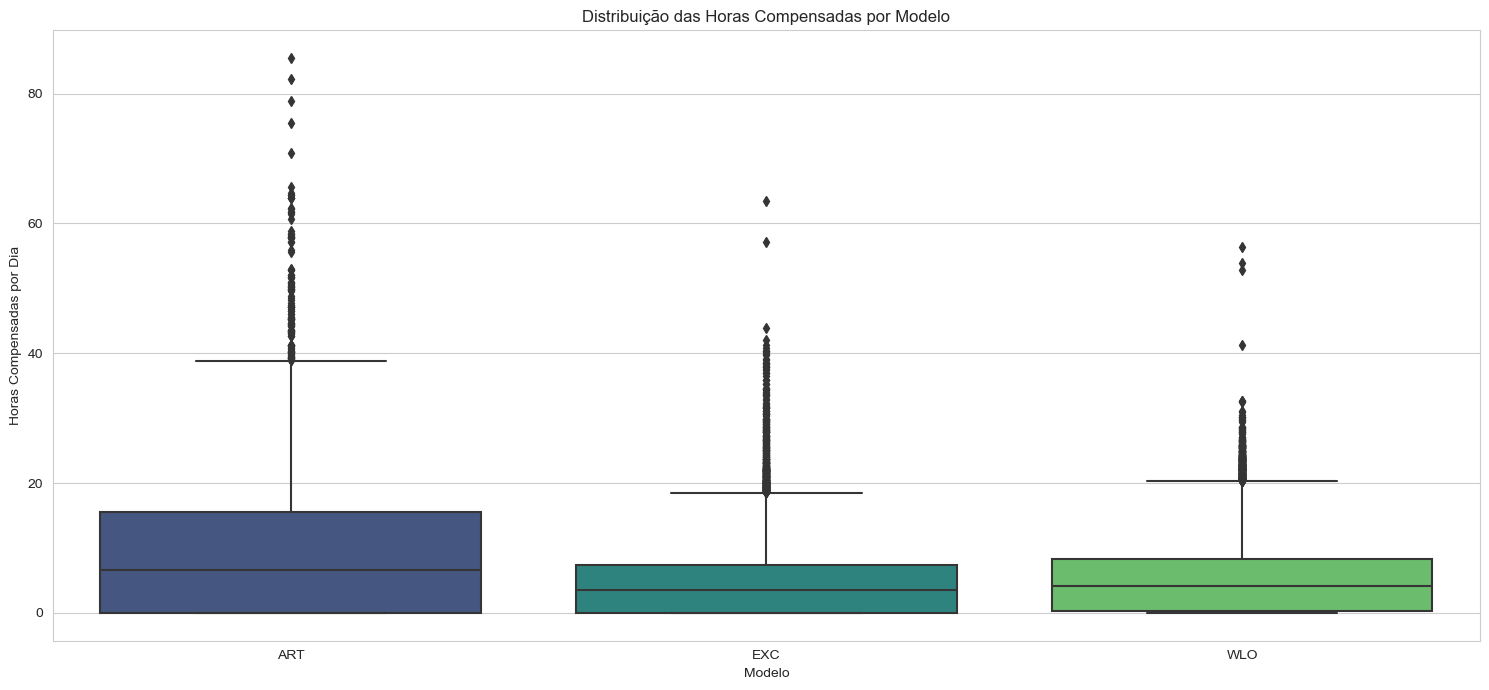

In [80]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=merged_df, x='Modelo', y='Compensated Working Hours By Day', palette='viridis')
plt.title('Distribuição das Horas Compensadas por Modelo')
plt.ylabel('Horas Compensadas por Dia')
plt.xlabel('Modelo')
plt.tight_layout()
plt.show()

Passo 12: Análise Temporal Detalhada
Tendências Gerais:
Primeiro, vamos observar as tendências gerais das horas compensadas ao longo do tempo.

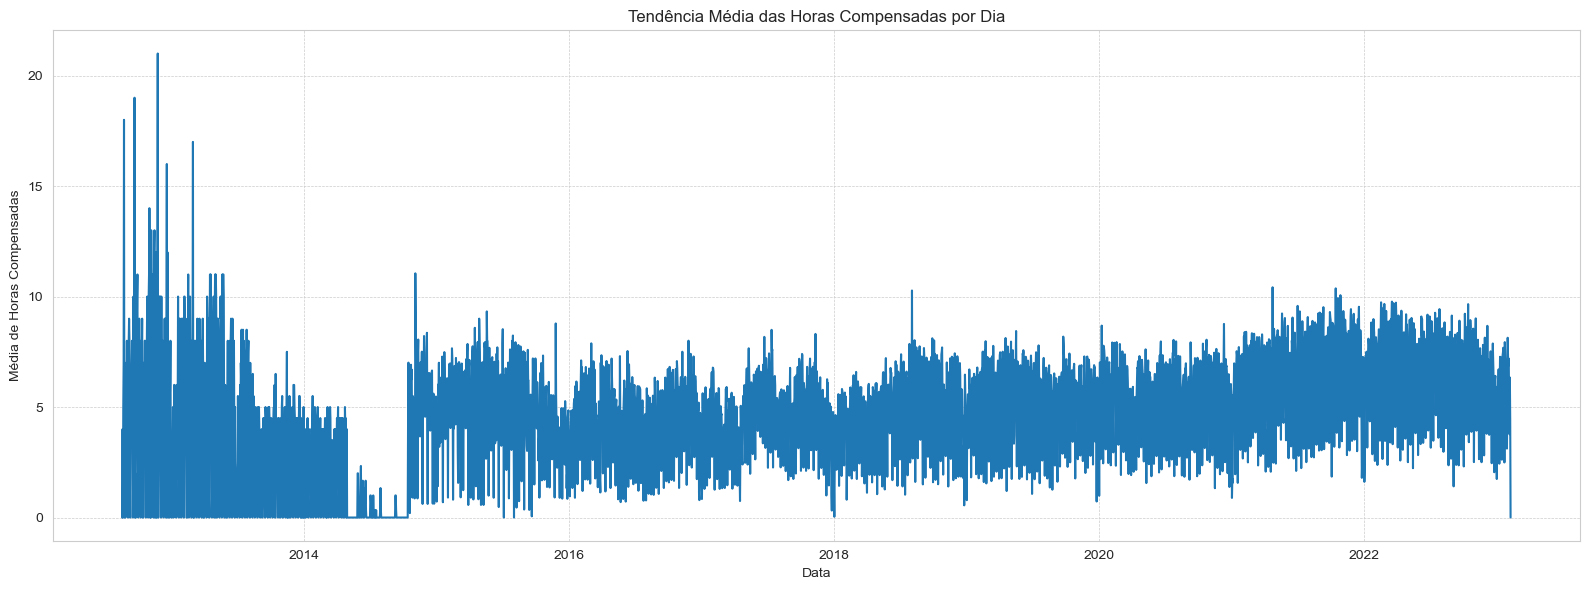

In [81]:
# Agrupando por data e calculando a média diária
time_series_avg = merged_df.groupby('Machine History Date Day')['Compensated Working Hours By Day'].mean().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(data=time_series_avg, x='Machine History Date Day', y='Compensated Working Hours By Day')
plt.title('Tendência Média das Horas Compensadas por Dia')
plt.ylabel('Média de Horas Compensadas')
plt.xlabel('Data')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Tendências por Categoria:
Podemos também observar como diferentes categorias (como País ou Segmento) se comportam ao longo do tempo.
Por exemplo, para ver a tendência das horas compensadas por país:

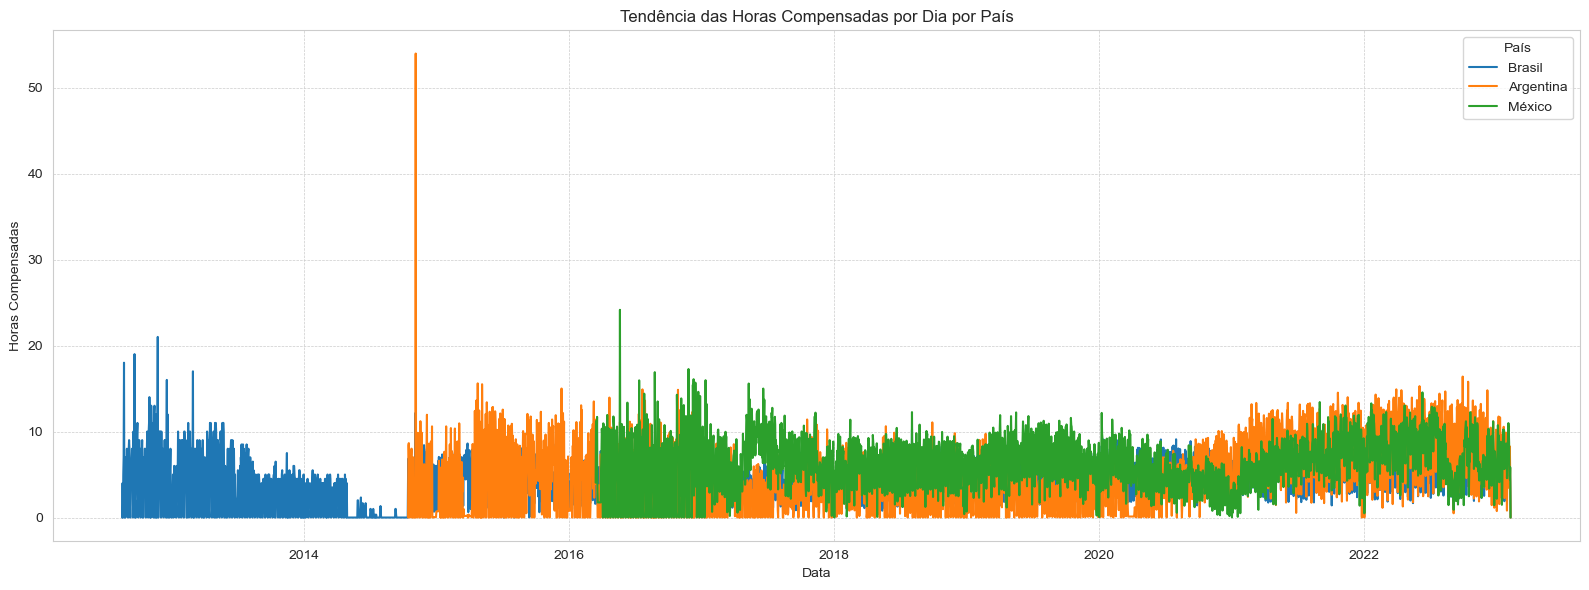

In [82]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='País', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por País')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='País')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

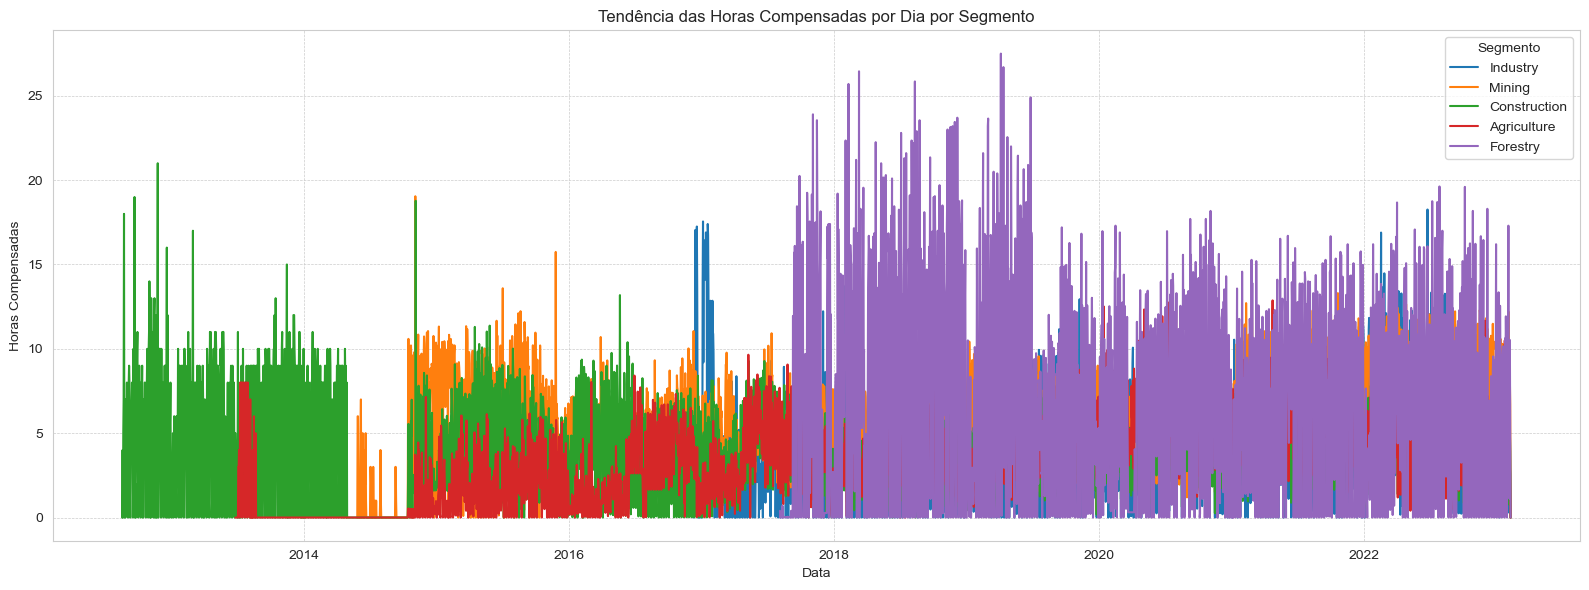

In [83]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='Segmento', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por Segmento')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='Segmento')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

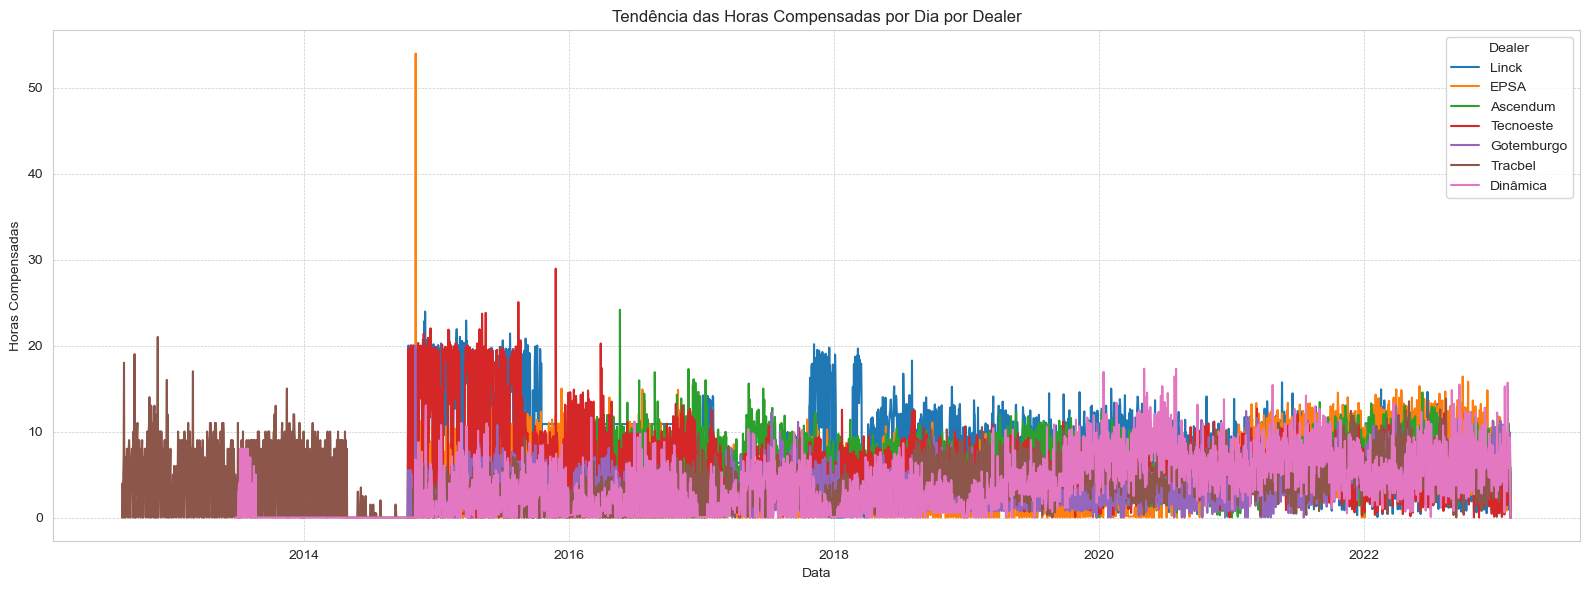

In [84]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='Dealer', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por Dealer')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='Dealer')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

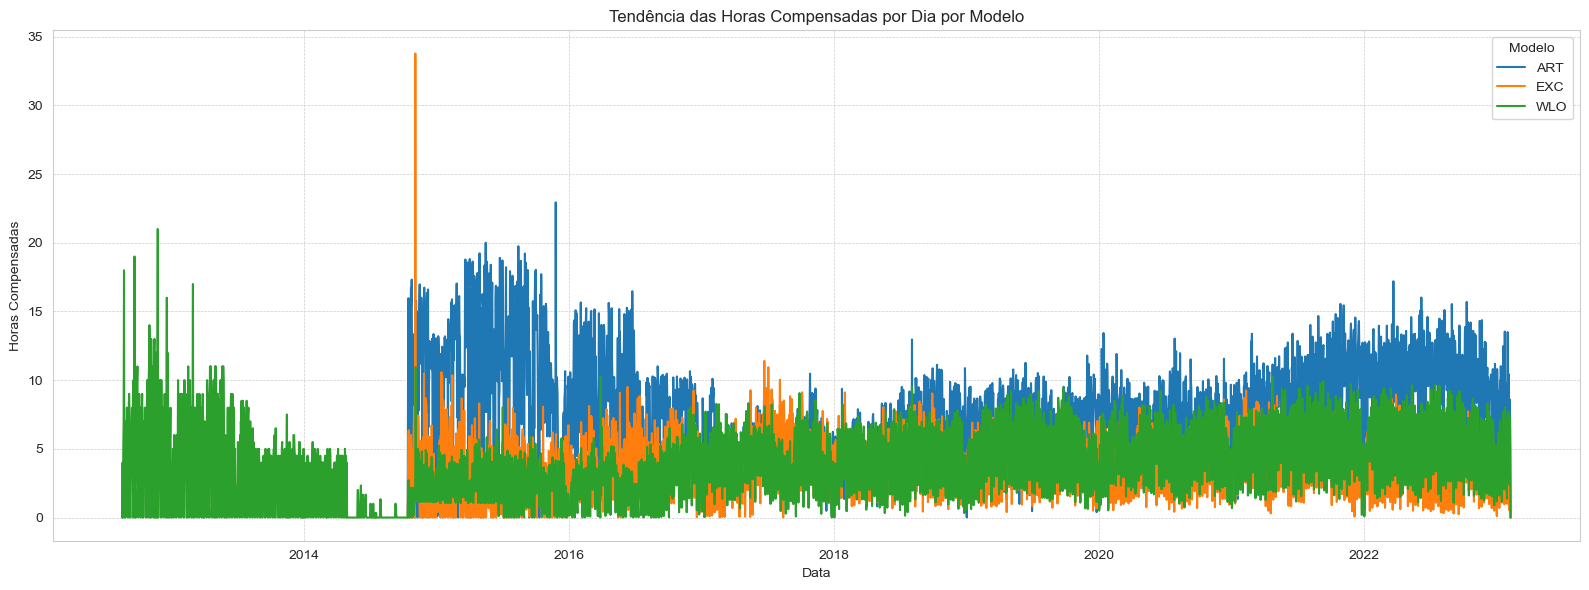

In [85]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='Modelo', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por Modelo')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='Modelo')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

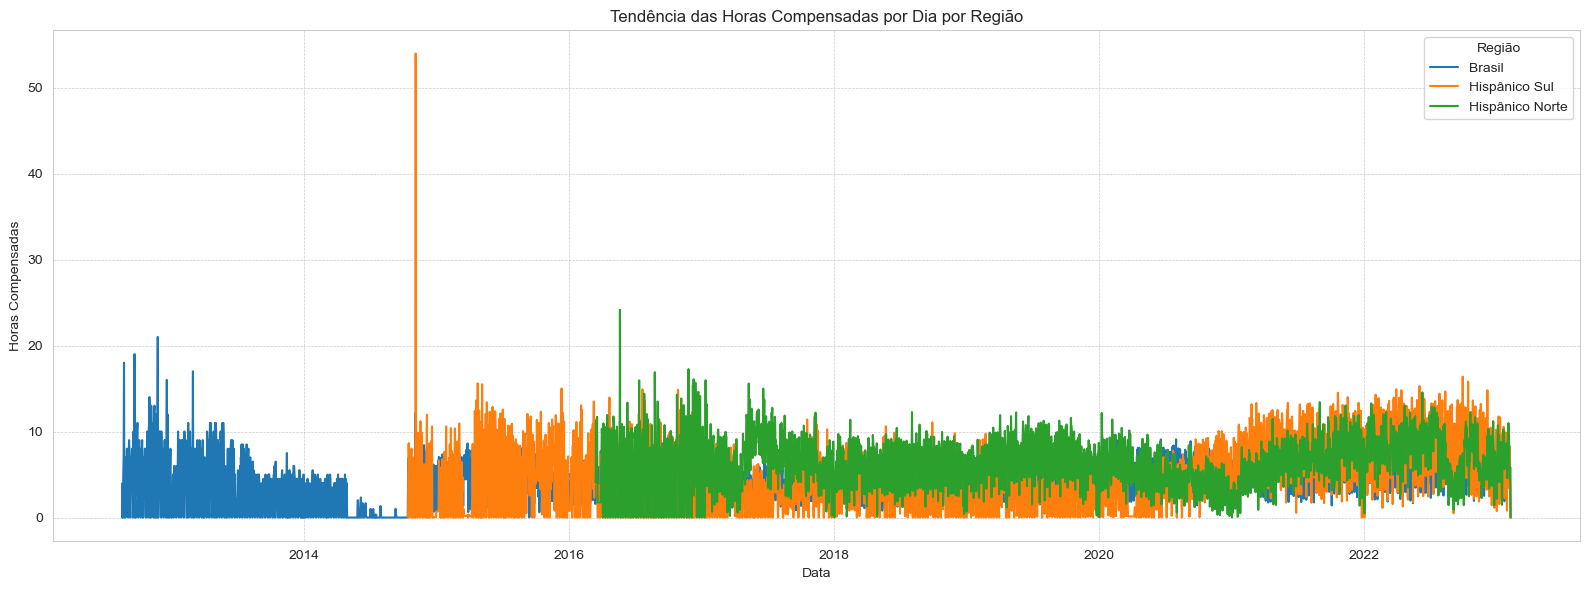

In [86]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=merged_df, x='Machine History Date Day', y='Compensated Working Hours By Day', hue='Região', ci=None)
plt.title('Tendência das Horas Compensadas por Dia por Região')
plt.ylabel('Horas Compensadas')
plt.xlabel('Data')
plt.legend(title='Região')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Análise de Sazonalidade:
Para entender se existe algum padrão sazonal nas horas compensadas, podemos decompor a série temporal.

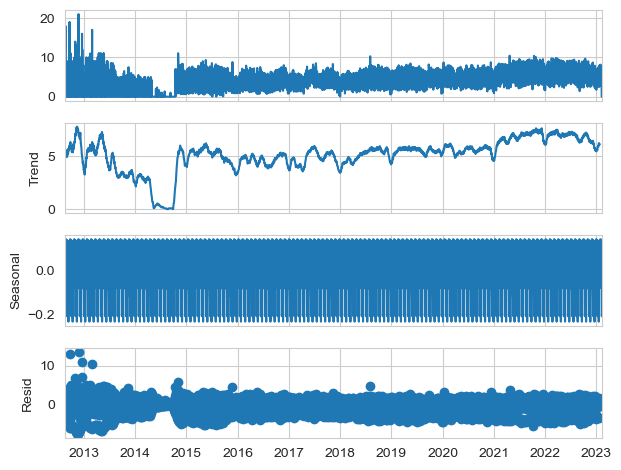

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição da série temporal
decomposition = seasonal_decompose(time_series_avg.set_index('Machine History Date Day'), period=30)  # period pode ser ajustado conforme a sazonalidade esperada

# Plotando a decomposição
decomposition.plot()
plt.show()

Passo 14: Modelagem dos Dados
Dado que nosso objetivo é prever o "horímetro" de um equipamento (quantidade de horas de operação que um equipamento tem), estamos lidando com um problema de regressão.

Vamos começar com um modelo de regressão básico e, em seguida, explorar modelos mais complexos.

Preparação dos Dados:
Primeiro, certifique-se de que os dados estão preparados. Se você já fez a preparação anteriormente, pode pular essa etapa. Caso contrário, siga os passos de preparação mencionados anteriormente.

Construção do Modelo de Regressão:
Vamos começar com um modelo de regressão linear simples para estabelecer uma linha de base.

In [114]:
for i in range(1, 8):
    series_temporais_df[f'Lag_{i}'] = series_temporais_df.groupby('Chassis Id*')['Compensated Working Hours By Day'].shift(i)

lag_features = [f'Lag_{i}' for i in range(1, 8)]
series_temporais_df[lag_features] = series_temporais_df[lag_features].fillna(0)

In [128]:
merged_df = series_temporais_df.merge(equipamentos_df, left_on='Chassis Id*', right_on='Chassis ID', how='left')

In [129]:
# Extração de características temporais
merged_df['Year'] = merged_df['Machine History Date Day'].dt.year
merged_df['Month'] = merged_df['Machine History Date Day'].dt.month
merged_df['Day'] = merged_df['Machine History Date Day'].dt.day
merged_df['Weekday'] = merged_df['Machine History Date Day'].dt.weekday
merged_df['Week_of_Year'] = merged_df['Machine History Date Day'].dt.isocalendar().week

# Agora, podemos excluir a coluna original 'Machine History Date Day'
merged_df = merged_df.drop(columns=['Machine History Date Day'])

In [130]:
# 1. Excluir Colunas Não Relevantes
cols_to_drop = ['Chassis Id*', 'Chassis ID', 'PIN17', 'Obs.:', 'Delivery Date']
merged_df_cleaned = merged_df.drop(columns=cols_to_drop)

# 2. Codificar Variáveis Categóricas
merged_df_encoded = pd.get_dummies(merged_df_cleaned, drop_first=True)

# 3. Tratar Valores Ausentes
for column in merged_df_encoded.columns:
    merged_df_encoded[column].fillna(merged_df_encoded[column].mean(), inplace=True)

# 4. Dividir os Dados
X = merged_df_encoded.drop(columns=['Compensated Working Hours By Day'])
y = merged_df_encoded['Compensated Working Hours By Day']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [131]:
merged_df_cleaned.head()

,Compensated Working Hours By Day,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Região,País,Dealer,Segmento,Modelo,Estado,Região.1,Year,Month,Day,Weekday,Week_of_Year
0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,9,4,49
1,5.75,0.00,0.00,0.00,0.0,0.0,0.0,0.0,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,10,5,49
2,8.95,5.75,0.00,0.00,0.0,0.0,0.0,0.0,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,11,6,49
3,1.60,8.95,5.75,0.00,0.0,0.0,0.0,0.0,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,12,0,50
4,8.20,1.60,8.95,5.75,0.0,0.0,0.0,0.0,Brasil,Brasil,Linck,Industry,ART,Paraná,Sul,2016,12,13,1,50


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializando o modelo
linear_regressor = LinearRegression()

# Treinando o modelo
linear_regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = linear_regressor.predict(X_test)

# Calculando métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 19.782411601045524
Root Mean Squared Error (RMSE): 4.447742303803754
R-squared (R2): 0.5145300378520604


1. Diferença Temporal
Vamos calcular a diferença entre a data atual e a Delivery Date para obter a "idade" da máquina em dias.

In [133]:
merged_df['Machine_Age'] = (pd.Timestamp.now() - merged_df['Delivery Date']).dt.days


2. Dados Históricos
Podemos calcular estatísticas como média, mediana, e soma das horas trabalhadas nos últimos N dias. Por simplicidade, vamos calcular a média das horas trabalhadas nos últimos 7 dias.

In [134]:
merged_df['Average_Hours_Last_7_Days'] = merged_df.groupby('Chassis ID')['Compensated Working Hours By Day'].transform(lambda x: x.rolling(7, 1).mean())
#merged_df['Average_Hours_Last_3_Days'] = merged_df.groupby('Chassis ID')['Compensated Working Hours By Day'].transform(lambda x: x.rolling(3, 1).mean())
merged_df['Average_Hours_Last_5_Days'] = merged_df.groupby('Chassis ID')['Compensated Working Hours By Day'].transform(lambda x: x.rolling(5, 1).mean())

3. Agrupar e Agregar
Vamos criar características que representem a média de horas trabalhadas agrupadas por "País" e "Dealer".

In [135]:
merged_df['Average_Hours_By_Country'] = merged_df.groupby('País')['Compensated Working Hours By Day'].transform('mean')
merged_df['Average_Hours_By_Dealer'] = merged_df.groupby('Dealer')['Compensated Working Hours By Day'].transform('mean')

4. Interação entre Características
Vamos criar uma nova característica que combina "Segmento" e "Modelo".

In [136]:
merged_df['Segment_Model'] = merged_df['Segmento'] + "_" + merged_df['Modelo']

In [137]:
# 1. Excluir Colunas Não Relevantes
cols_to_drop = ['Chassis Id*', 'Chassis ID', 'PIN17', 'Obs.:', 'Delivery Date']
merged_df_cleaned = merged_df.drop(columns=cols_to_drop)

# 2. Codificar Variáveis Categóricas
merged_df_encoded = pd.get_dummies(merged_df_cleaned, drop_first=True)

# 3. Tratar Valores Ausentes
for column in merged_df_encoded.columns:
    merged_df_encoded[column].fillna(merged_df_encoded[column].mean(), inplace=True)

# 4. Dividir os Dados
X = merged_df_encoded.drop(columns=['Compensated Working Hours By Day'])
y = merged_df_encoded['Compensated Working Hours By Day']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Inicializando o modelo
linear_regressor = LinearRegression()

# Treinando o modelo
linear_regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = linear_regressor.predict(X_test)

# Calculando métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.05142942547526443
Root Mean Squared Error (RMSE): 0.2267805667936837
R-squared (R2): 0.998737896989392


In [139]:
from sklearn.metrics import mean_squared_error

for column in X_train.columns:
    # Treinar um modelo de regressão linear usando apenas uma característica
    lr_single = LinearRegression()
    lr_single.fit(X_train[[column]], y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred_single = lr_single.predict(X_test[[column]])
    
    # Calcular o RMSE
    rmse_single = np.sqrt(mean_squared_error(y_test, y_pred_single))
    print(f"RMSE usando apenas {column}: {rmse_single:.2f}")

RMSE usando apenas Lag_1: 5.35
RMSE usando apenas Lag_2: 5.51
RMSE usando apenas Lag_3: 5.63
RMSE usando apenas Lag_4: 5.62
RMSE usando apenas Lag_5: 5.62
RMSE usando apenas Lag_6: 5.42
RMSE usando apenas Lag_7: 5.06
RMSE usando apenas Year: 6.34
RMSE usando apenas Month: 6.38
RMSE usando apenas Day: 6.38
RMSE usando apenas Weekday: 6.30
RMSE usando apenas Week_of_Year: 6.38
RMSE usando apenas Machine_Age: 6.30
RMSE usando apenas Average_Hours_Last_7_Days: 4.22
RMSE usando apenas Average_Hours_Last_5_Days: 4.09
RMSE usando apenas Average_Hours_By_Country: 6.36
RMSE usando apenas Average_Hours_By_Dealer: 6.29
RMSE usando apenas Região_Hispânico Norte: 6.37
RMSE usando apenas Região_Hispânico Sul: 6.38
RMSE usando apenas País_Brasil: 6.36
RMSE usando apenas País_México: 6.37
RMSE usando apenas Dealer_Dinâmica: 6.38
RMSE usando apenas Dealer_EPSA: 6.38
RMSE usando apenas Dealer_Gotemburgo: 6.35
RMSE usando apenas Dealer_Linck: 6.35


RMSE usando apenas Dealer_Tecnoeste: 6.38
RMSE usando apenas Dealer_Tracbel: 6.37
RMSE usando apenas Segmento_Construction: 6.36
RMSE usando apenas Segmento_Forestry: 6.37
RMSE usando apenas Segmento_Industry: 6.38
RMSE usando apenas Segmento_Mining: 6.33
RMSE usando apenas Modelo_EXC: 6.31
RMSE usando apenas Modelo_WLO: 6.36
RMSE usando apenas Estado_Bahia: 6.37
RMSE usando apenas Estado_Catamarca Province: 6.34
RMSE usando apenas Estado_Coahuila de Zaragoza: 6.38
RMSE usando apenas Estado_Entre Ríos: 6.38
RMSE usando apenas Estado_Estado de México: 6.38
RMSE usando apenas Estado_Hidalgo: 6.38
RMSE usando apenas Estado_Jujuy: 6.38
RMSE usando apenas Estado_Mato Grosso: 6.38
RMSE usando apenas Estado_Mato Grosso do Sul: 6.38
RMSE usando apenas Estado_Minas Gerais: 6.37
RMSE usando apenas Estado_Misiónes: 6.35
RMSE usando apenas Estado_Nuevo León: 6.38
RMSE usando apenas Estado_Paraná: 6.38
RMSE usando apenas Estado_Pará: 6.37
RMSE usando apenas Estado_Pernambuco: 6.34
RMSE usando apena

In [140]:
for column in X_train.columns:
    # Excluir uma característica
    X_train_drop = X_train.drop(columns=[column])
    X_test_drop = X_test.drop(columns=[column])
    
    # Treinar um modelo de regressão linear sem a característica
    lr_drop = LinearRegression()
    lr_drop.fit(X_train_drop, y_train)
    
    # Fazer previsões no conjunto de teste
    y_pred_drop = lr_drop.predict(X_test_drop)
    
    # Calcular o RMSE
    rmse_drop = np.sqrt(mean_squared_error(y_test, y_pred_drop))
    print(f"RMSE sem {column}: {rmse_drop:.2f}")


RMSE sem Lag_1: 2.92
RMSE sem Lag_2: 2.98
RMSE sem Lag_3: 3.09
RMSE sem Lag_4: 3.12
RMSE sem Lag_5: 0.35
RMSE sem Lag_6: 0.35
RMSE sem Lag_7: 0.23
RMSE sem Year: 0.23
RMSE sem Month: 0.23
RMSE sem Day: 0.23
RMSE sem Weekday: 0.23
RMSE sem Week_of_Year: 0.23
RMSE sem Machine_Age: 0.23
RMSE sem Average_Hours_Last_7_Days: 0.35
RMSE sem Average_Hours_Last_5_Days: 0.73
RMSE sem Average_Hours_By_Country: 0.23
RMSE sem Average_Hours_By_Dealer: 0.23
RMSE sem Região_Hispânico Norte: 0.23
RMSE sem Região_Hispânico Sul: 0.23
RMSE sem País_Brasil: 0.23
RMSE sem País_México: 0.23
RMSE sem Dealer_Dinâmica: 0.23
RMSE sem Dealer_EPSA: 0.23
RMSE sem Dealer_Gotemburgo: 0.23
RMSE sem Dealer_Linck: 0.23
RMSE sem Dealer_Tecnoeste: 0.23
RMSE sem Dealer_Tracbel: 0.23
RMSE sem Segmento_Construction: 0.23
RMSE sem Segmento_Forestry: 0.23
RMSE sem Segmento_Industry: 0.23
RMSE sem Segmento_Mining: 0.23
RMSE sem Modelo_EXC: 0.23
RMSE sem Modelo_WLO: 0.23
RMSE sem Estado_Bahia: 0.23
RMSE sem Estado_Catamarca Provi